 # **Energy Consumption Prediction US Using Linear Regression**

The primary objective of this project is to develop a predictive model using **Linear Regression** to estimate future energy consumption in the United States. By analyzing historical energy consumption data and key influencing factors such as population growth,**Energy Consumption (MWh)**, **WeatherCondition**, **Temperature changes**, and government policies. The dataset undergoes comprehensive preprocessing, including handling missing values, encoding categorical variables, and normalizing numerical features. The model’s performance is evaluated using metrics such as **RMSE, MAE, and R²**.

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **sklearn.pipeline**:
  * **Pipeline**: Automates a sequence of data processing and model training steps, ensuring a streamlined workflow without repeated manual operations.


In [58]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
df = pd.read_csv(r"E:\PG-32\Machine Learning\Linear Regression Model\energy_consumption_us.csv")
df

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index),Energy Consumption (MWh)
0,56.217808,87.607551,1.345118,5.041707,58.564862,587.799806
1,96.550001,50.274851,1.898359,6.198518,66.581475,683.414240
2,81.239576,41.827129,19.977852,6.138163,82.908408,724.395670
3,71.906094,55.429930,6.532785,3.991840,119.652537,827.917557
4,40.921305,50.765818,14.963678,3.839799,114.987640,723.512550
...,...,...,...,...,...,...
1695,34.772062,89.731037,8.757998,3.570217,196.699014,1113.991018
1696,31.806833,77.779096,16.879869,9.654503,199.143198,1122.378096
1697,39.461640,79.140994,5.248168,3.815602,133.342573,822.405331
1698,97.418058,37.430612,8.434252,1.882401,75.521411,707.565723


In [62]:
print("Dataset Shape:\n", df.shape)
print("\nSample Data:\n", df.head())

Dataset Shape:
 (1700, 6)

Sample Data:
    Temperature (°F)  Humidity (%)  Wind Speed (mph)  Population (millions)  \
0         56.217808     87.607551          1.345118               5.041707   
1         96.550001     50.274851          1.898359               6.198518   
2         81.239576     41.827129         19.977852               6.138163   
3         71.906094     55.429930          6.532785               3.991840   
4         40.921305     50.765818         14.963678               3.839799   

   Industrial Activity (index)  Energy Consumption (MWh)  
0                    58.564862                587.799806  
1                    66.581475                683.414240  
2                    82.908408                724.395670  
3                   119.652537                827.917557  
4                   114.987640                723.512550  


In [64]:
df.head(10)

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index),Energy Consumption (MWh)
0,56.217808,87.607551,1.345118,5.041707,58.564862,587.799806
1,96.550001,50.274851,1.898359,6.198518,66.581475,683.414240
2,81.239576,41.827129,19.977852,6.138163,82.908408,724.395670
3,71.906094,55.429930,6.532785,3.991840,119.652537,827.917557
4,40.921305,50.765818,14.963678,3.839799,114.987640,723.512550
5,40.919616,27.396528,16.133301,1.959613,169.953779,896.029350
6,34.065853,64.857842,17.160465,4.301185,160.921198,928.051552
7,90.632330,35.122673,19.952566,1.895452,113.947744,826.544093
8,72.078051,63.371157,4.829930,7.899364,100.055631,799.911296
9,79.565080,65.514076,0.807017,9.696469,97.470318,820.571034


In [66]:
df.dtypes

Temperature (°F)               float64
Humidity (%)                   float64
Wind Speed (mph)               float64
Population (millions)          float64
Industrial Activity (index)    float64
Energy Consumption (MWh)       float64
dtype: object

## **Step 2 : Exploratory Data Analysis**

In [69]:
print(df.describe())

       Temperature (°F)  Humidity (%)  Wind Speed (mph)  \
count       1700.000000   1700.000000       1700.000000   
mean          64.956407     54.821574          9.840139   
std           20.513350     20.146896          5.750942   
min           30.324242     20.000814          0.000614   
25%           46.628075     37.726077          4.792631   
50%           65.527734     55.042974          9.723041   
75%           82.701742     72.030536         14.817784   
max           99.980237     89.884326         19.991154   

       Population (millions)  Industrial Activity (index)  \
count            1700.000000                  1700.000000   
mean                5.485455                   122.634245   
std                 2.602307                    43.034447   
min                 1.012855                    50.036151   
25%                 3.251846                    85.030159   
50%                 5.429660                   121.530934   
75%                 7.784322             

In [71]:
print("\n Missing Value in Each Column:")
print(df.isnull().sum())


 Missing Value in Each Column:
Temperature (°F)               0
Humidity (%)                   0
Wind Speed (mph)               0
Population (millions)          0
Industrial Activity (index)    0
Energy Consumption (MWh)       0
dtype: int64


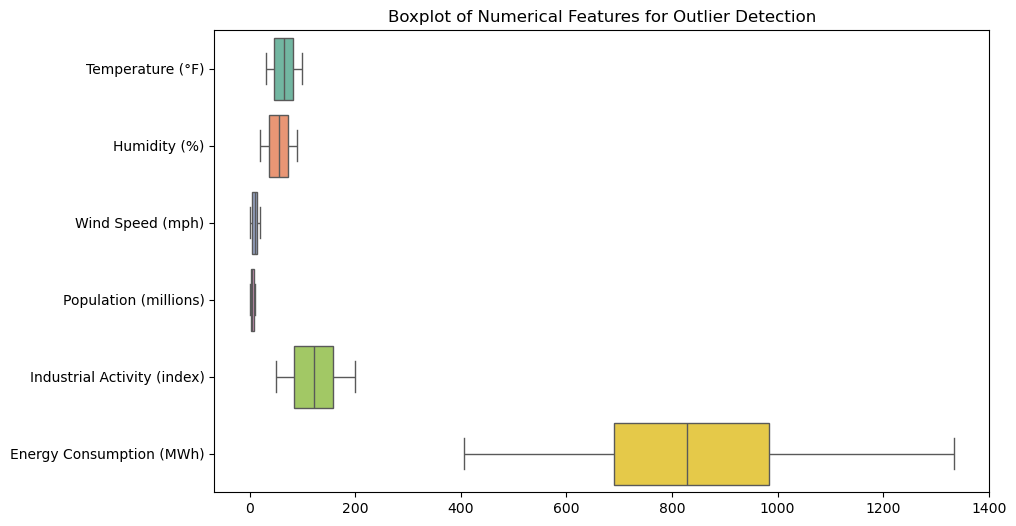

In [73]:
numerical_cols = ['Temperature (°F)','Humidity (%)','Wind Speed (mph)','Population (millions)','Industrial Activity (index)','Energy Consumption (MWh)']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

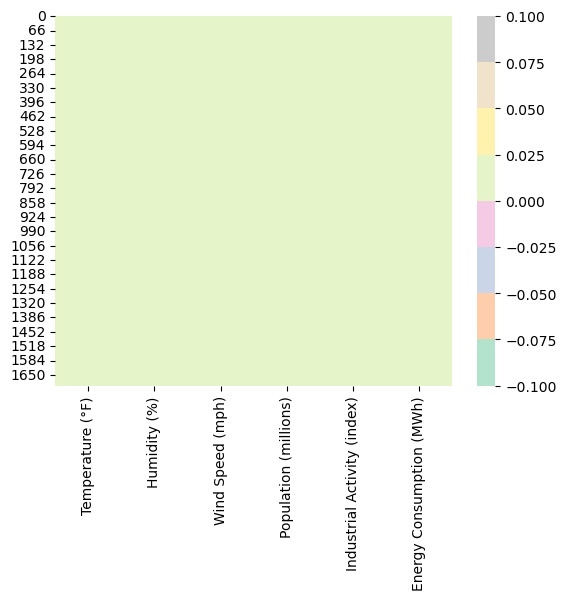

In [74]:
# Heatmap
sns.heatmap(df.isnull(),cmap='Pastel2');
plt.show()

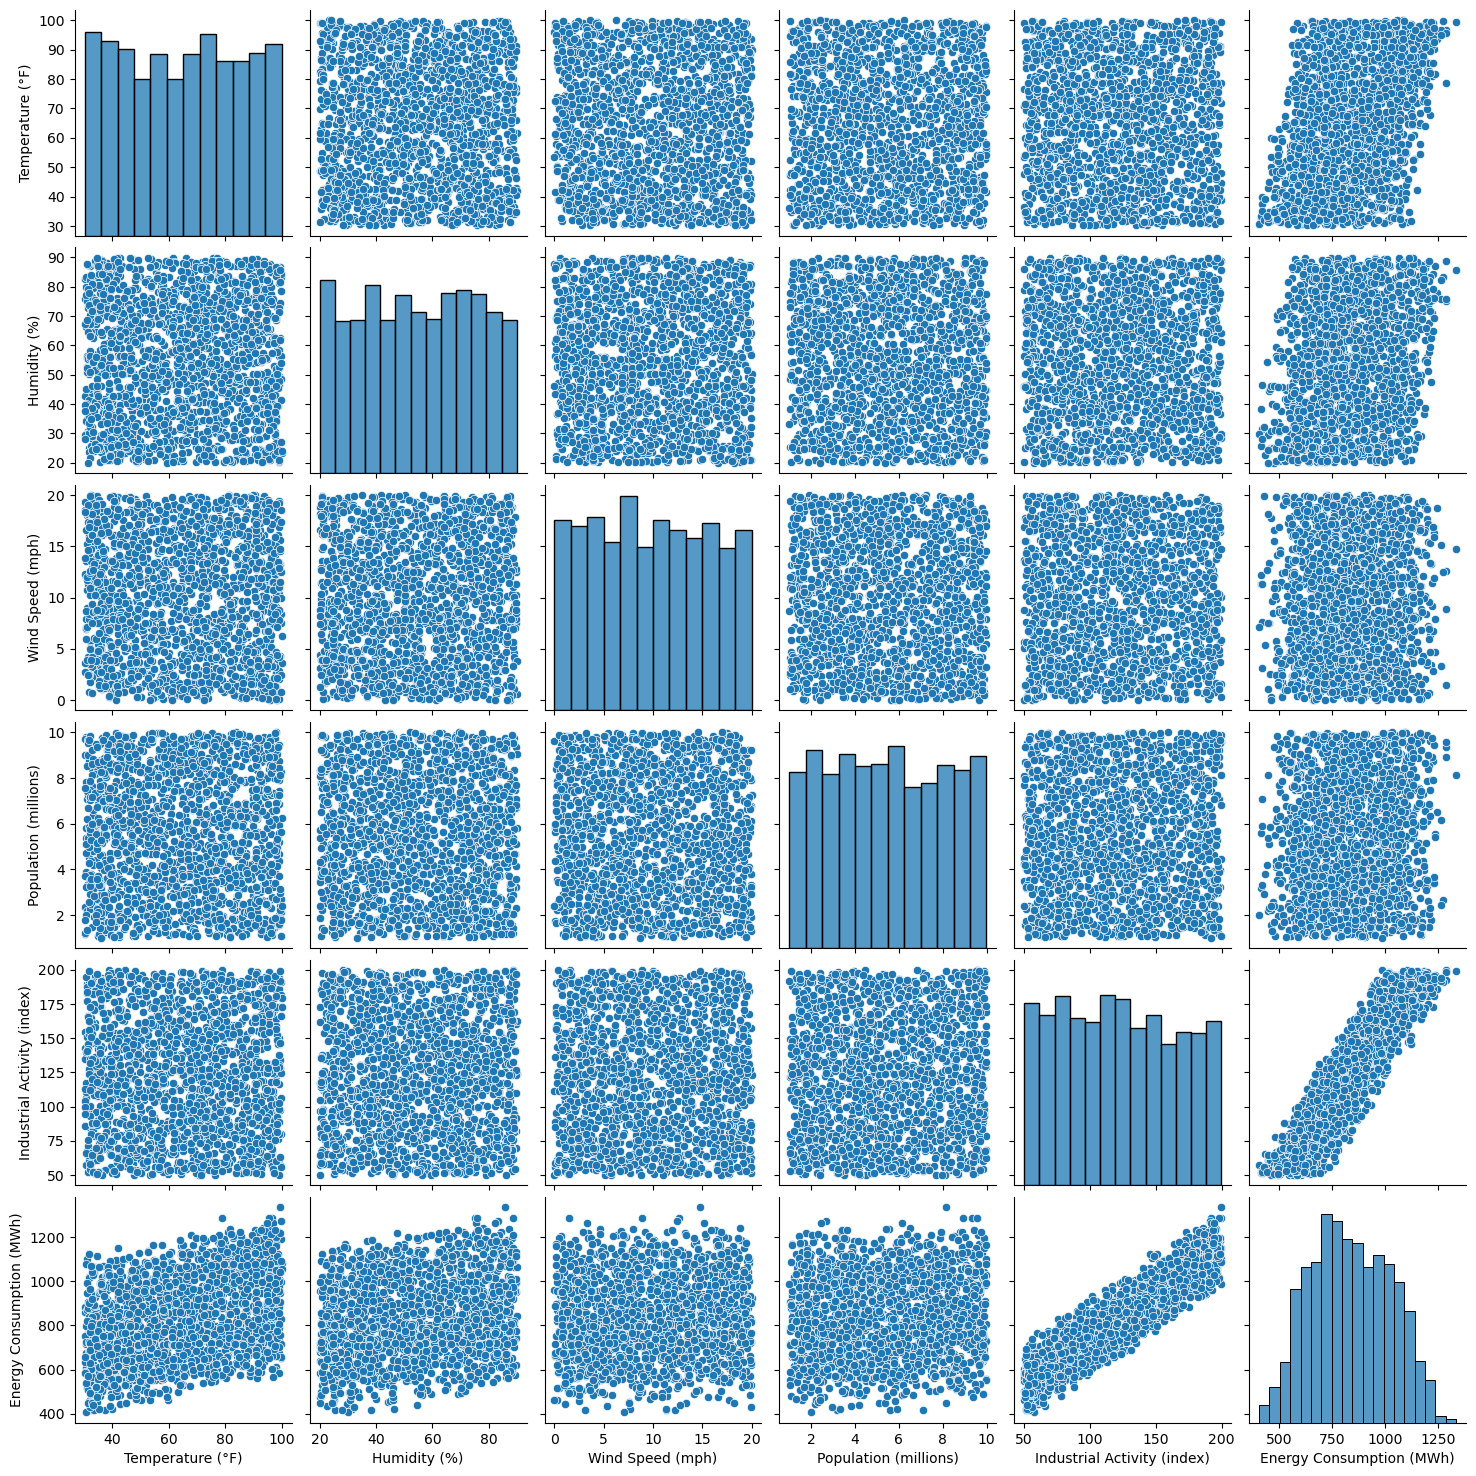

In [76]:
sns.pairplot(df)
plt.show()

<Axes: >

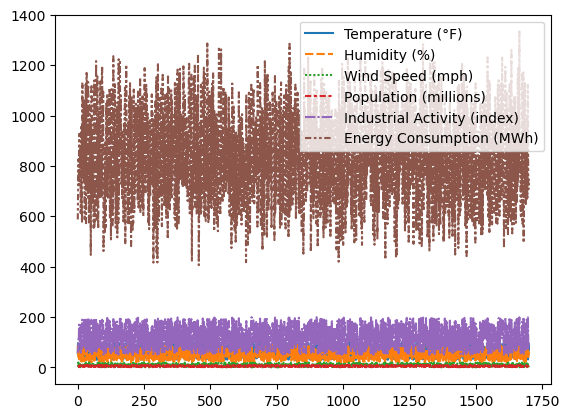

In [77]:
sns.lineplot(data=df)

In [78]:
df.isna()

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index),Energy Consumption (MWh)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1695,False,False,False,False,False,False
1696,False,False,False,False,False,False
1697,False,False,False,False,False,False
1698,False,False,False,False,False,False


In [80]:
df.isna().any()

Temperature (°F)               False
Humidity (%)                   False
Wind Speed (mph)               False
Population (millions)          False
Industrial Activity (index)    False
Energy Consumption (MWh)       False
dtype: bool

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature (°F)             1700 non-null   float64
 1   Humidity (%)                 1700 non-null   float64
 2   Wind Speed (mph)             1700 non-null   float64
 3   Population (millions)        1700 non-null   float64
 4   Industrial Activity (index)  1700 non-null   float64
 5   Energy Consumption (MWh)     1700 non-null   float64
dtypes: float64(6)
memory usage: 79.8 KB


In [82]:
df.tail()

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index),Energy Consumption (MWh)
1695,34.772062,89.731037,8.757998,3.570217,196.699014,1113.991018
1696,31.806833,77.779096,16.879869,9.654503,199.143198,1122.378096
1697,39.461640,79.140994,5.248168,3.815602,133.342573,822.405331
1698,97.418058,37.430612,8.434252,1.882401,75.521411,707.565723
1699,68.467068,60.369168,0.798451,5.741354,97.415733,749.410322


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperature (°F)             1700 non-null   float64
 1   Humidity (%)                 1700 non-null   float64
 2   Wind Speed (mph)             1700 non-null   float64
 3   Population (millions)        1700 non-null   float64
 4   Industrial Activity (index)  1700 non-null   float64
 5   Energy Consumption (MWh)     1700 non-null   float64
dtypes: float64(6)
memory usage: 79.8 KB


## **Step 3 : Data Preprocessing**

 **Remove unnecessary Columns**

In [86]:
df.drop(columns=['Industrial Activity (index)'])

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Energy Consumption (MWh)
0,56.217808,87.607551,1.345118,5.041707,587.799806
1,96.550001,50.274851,1.898359,6.198518,683.414240
2,81.239576,41.827129,19.977852,6.138163,724.395670
3,71.906094,55.429930,6.532785,3.991840,827.917557
4,40.921305,50.765818,14.963678,3.839799,723.512550
...,...,...,...,...,...
1695,34.772062,89.731037,8.757998,3.570217,1113.991018
1696,31.806833,77.779096,16.879869,9.654503,1122.378096
1697,39.461640,79.140994,5.248168,3.815602,822.405331
1698,97.418058,37.430612,8.434252,1.882401,707.565723


**Define features (X) and target (y)**

In [88]:
x = df.drop(columns=["Energy Consumption (MWh)"])
y = df["Energy Consumption (MWh)"]

In [89]:
x

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index)
0,56.217808,87.607551,1.345118,5.041707,58.564862
1,96.550001,50.274851,1.898359,6.198518,66.581475
2,81.239576,41.827129,19.977852,6.138163,82.908408
3,71.906094,55.429930,6.532785,3.991840,119.652537
4,40.921305,50.765818,14.963678,3.839799,114.987640
...,...,...,...,...,...
1695,34.772062,89.731037,8.757998,3.570217,196.699014
1696,31.806833,77.779096,16.879869,9.654503,199.143198
1697,39.461640,79.140994,5.248168,3.815602,133.342573
1698,97.418058,37.430612,8.434252,1.882401,75.521411


In [90]:
y

0        587.799806
1        683.414240
2        724.395670
3        827.917557
4        723.512550
           ...     
1695    1113.991018
1696    1122.378096
1697     822.405331
1698     707.565723
1699     749.410322
Name: Energy Consumption (MWh), Length: 1700, dtype: float64

**Identify numeric and categorical columns**

In [92]:
numerical_cols = ['Temperature (°F)','Humidity (%)','Wind Speed (mph)','Population (millions)',
'Industrial Activity (index)','Energy Consumption (MWh)']

In [93]:
# Drop rows with missing values (or use imputation)
df = df.dropna()  # OR
df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean


In [94]:
numerical_cols = ['Temperature (°F)','Humidity (%)','Wind Speed (mph)','Population (millions)',
'Industrial Activity (index)','Energy Consumption (MWh)']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=numerical_cols)
print(scaled_cols)

      Temperature (°F)  Humidity (%)  Wind Speed (mph)  Population (millions)  \
0            -0.426121      1.627825         -1.477588              -0.170571   
1             1.540601     -0.225745         -1.381359               0.274092   
2             0.794018     -0.645175          1.763310               0.250893   
3             0.338888      0.030205         -0.575267              -0.574127   
4            -1.172026     -0.201368          0.891166              -0.632570   
...                ...           ...               ...                    ...   
1695         -1.471882      1.733256         -0.188223              -0.736194   
1696         -1.616475      1.139842          1.224461               1.602530   
1697         -1.243203      1.207460         -0.798708              -0.641871   
1698          1.582930     -0.863462         -0.244534              -1.384969   
1699          0.171191      0.275438         -1.572673               0.098364   

      Industrial Activity (

**Define column transformer to scale and encode**

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## **Step 4: Model Building**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an Linear Regression model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [100]:
x_train

,Temperature (°F),Humidity (%),Wind Speed (mph),Population (millions),Industrial Activity (index)
1376,61.171368,86.271361,0.011959,5.654187,85.401190
1323,45.344979,43.271931,8.373903,3.360469,148.241166
1179,67.888661,33.029513,12.912052,2.754485,156.377106
651,67.597458,83.930086,13.781753,8.187003,115.572216
464,97.352078,52.990102,2.117486,9.376050,170.883675
...,...,...,...,...,...
1130,80.639408,53.662310,5.375952,6.207075,173.270219
1294,86.041069,29.220052,8.813298,9.915785,129.845655
860,84.286933,75.616088,2.302924,4.603210,55.754233
1459,76.121983,40.466818,17.749379,9.596576,169.030610


In [101]:
y_train

1376     717.136120
1323     849.216890
1179     936.476532
651      906.655797
464     1122.860650
           ...     
1130    1076.936069
1294     898.016222
860      660.979783
1459    1076.675394
1126     996.449141
Name: Energy Consumption (MWh), Length: 1360, dtype: float64

**Training the model**

In [103]:
LR = LinearRegression()
LR

LinearRegression()

In [104]:
LR.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [106]:
y_pred = LR.predict(x_test)

In [107]:
mae =mean_absolute_error(y_test,y_pred)
print(f"MAE:{mae:.2f}")

MAE:8.76


In [108]:
mse = mean_squared_error(y_test,y_pred)
print(f"MSE:{mse:.2f}")

MSE:124.22


In [109]:
rmse = np.sqrt(mse)
print(f"RMSE:{rmse:.2f}")

RMSE:11.15


In [110]:
r2 = r2_score(y_test,y_pred)
print(f"R2_Score:{r2:}")

R2_Score:0.9964804428568947


In [111]:
lr_model = LinearRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv=5)

In [112]:
ridge_model = LinearRegression()
ridge_score = cross_val_score(ridge_model,x_train,y_train,cv=5)

In [113]:
lr_model.fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test , lr_prediction)
lr_mse
lr_r2 = r2_score(y_test,lr_prediction)
lr_r2*100

99.64804428568948

In [114]:
ridge_model.fit(x_train,y_train)
ridge_prediction = ridge_model.predict(x_test)
ridge_r2 = r2_score(y_test,ridge_prediction)
ridge_r2*100

99.64804428568948

In [128]:
lasso_model = LinearRegression()
lasso_model.fit(x_train,y_train)
lasso_prediction = lasso_model.predict(x_test)
lasso_r2 = r2_score(y_test,lasso_prediction)
lasso_r2*100

99.64804428568948

## Step 5 : Model Evaluation

**Histograms with KDE (Kernel Density Estimate) curves**


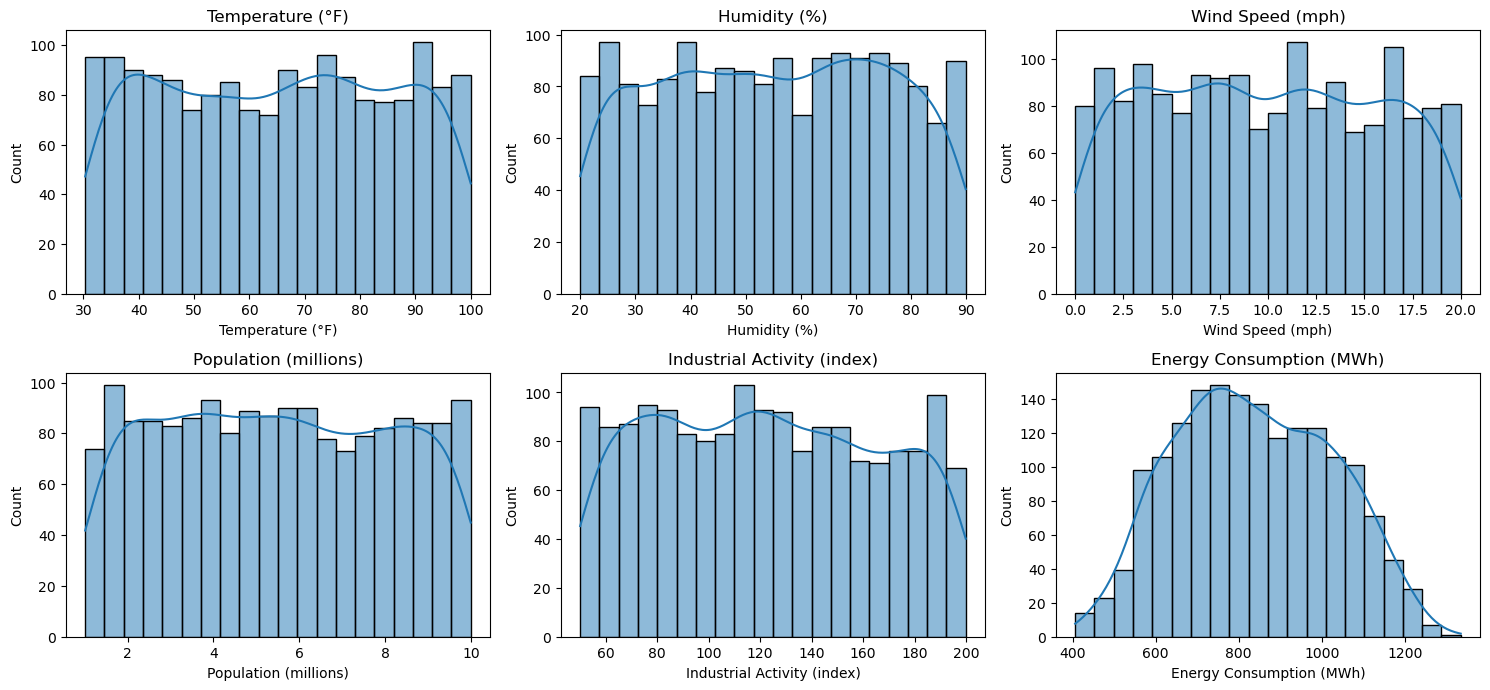

In [134]:
numerical_cols = ['Temperature (°F)','Humidity (%)','Wind Speed (mph)','Population (millions)',
'Industrial Activity (index)','Energy Consumption (MWh)']
plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column,  bins=20,kde=True)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()


**Histograms for all numerical features**


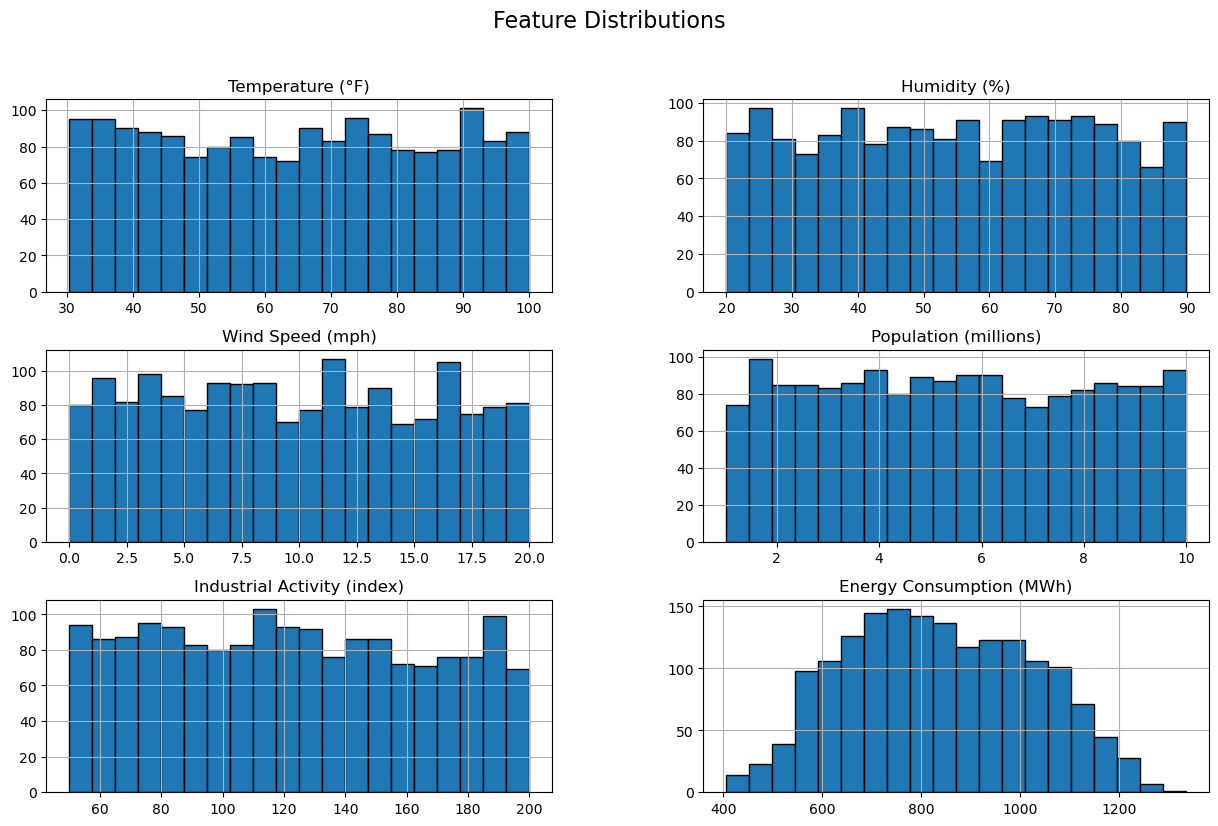

In [137]:
df.hist(figsize=(15, 9), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

**Comparing Actual vs. Predicted Energy Consumption**

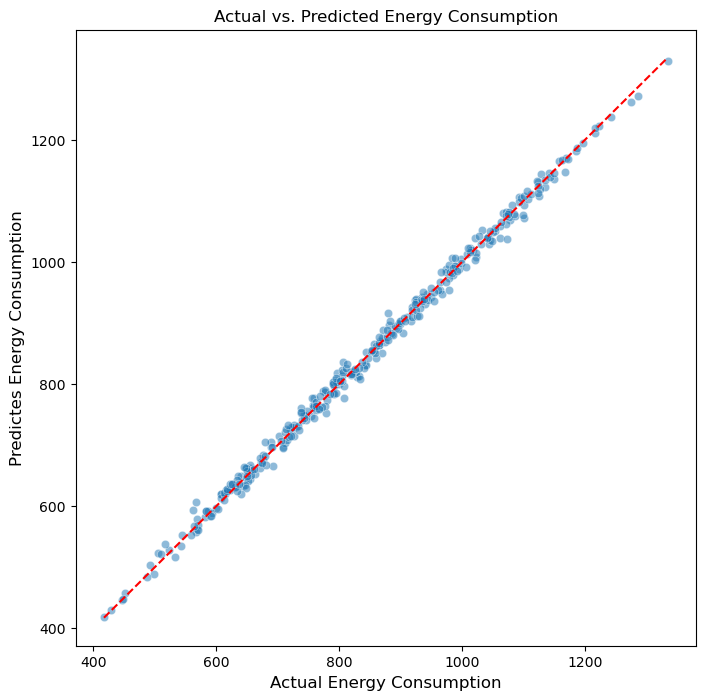

In [139]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Energy Consumption", fontsize=12)
plt.ylabel("Predictes Energy Consumption", fontsize=12)
plt.title("Actual vs. Predicted Energy Consumption", fontsize=12)
plt.show()

**Actual - Predicted Energy Consumption Error Distribution Graph : It helps assess model accuracy, bias, and variance.**


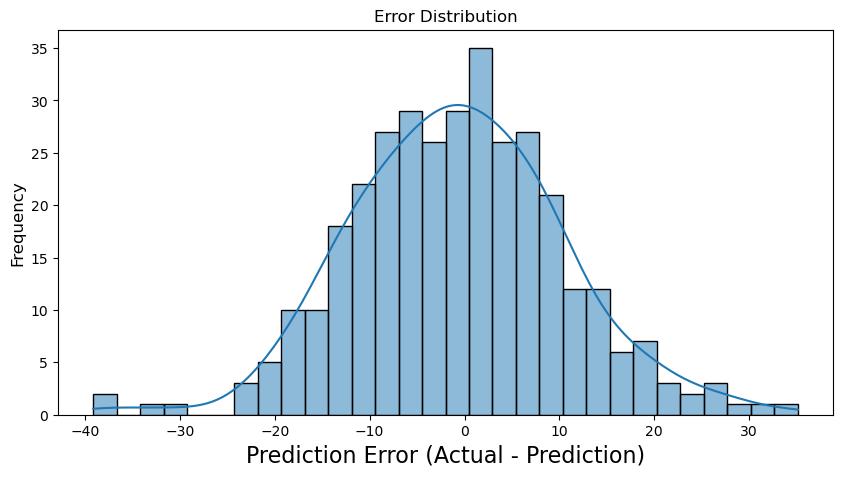

In [144]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Prediction)", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution", fontsize=12)
plt.show()

**Correlation Between Numerical Variables**

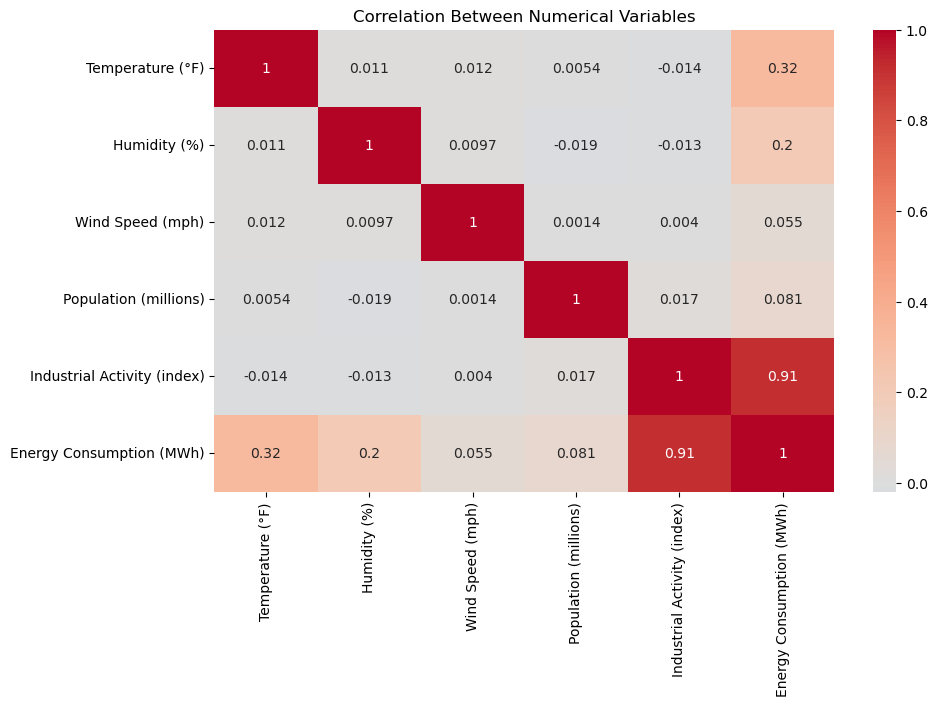

In [147]:
numerical_cols = ['Temperature (°F)','Humidity (%)','Wind Speed (mph)','Population (millions)',
'Industrial Activity (index)','Energy Consumption (MWh)']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()